In [496]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from scipy.linalg import eigh, cholesky
#how to make correlated norm samples:
#https://scipy-cookbook.readthedocs.io/items/CorrelatedRandomSamples.html

#or see:
#https://eranraviv.com/bias-vs-consistency/

In [24]:
sampled_parameters = stats.norm([0,0],[2,2]).rvs([10,2])

In [25]:
x_range = np.linspace(-10,10,10)

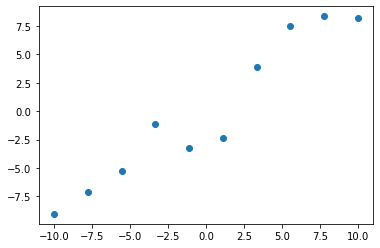

In [40]:
plt.scatter(x_range, stats.norm(x_range, 3).rvs())

# Try with a single parameter

The regularized version is exactly the same but shifted slightly away from the true value of 1!


In [82]:
params_one = list()
params_two = list()
for _ in range(1000):
    points = stats.norm(x_range, 3).rvs()
    clf = LinearRegression().fit(x_range.reshape(-1,1), points.reshape(-1,1))
    params_one.append(clf.coef_.flatten()[0])
    
    clf = Lasso().fit(x_range.reshape(-1,1), points.reshape(-1,1))
    params_two.append(clf.coef_.flatten()[0])

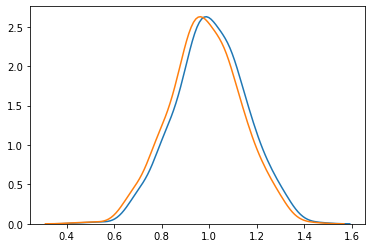

In [86]:
kdeplot(params_one)
kdeplot(params_two)

# Try with some correlated parameters:

Multicollinearity should increase the variance of the LinearRegression() function. The Lasso version should still be biased, but overall will perform better because it's variance is so much less. 

In [90]:
sampled_parameters = stats.norm([0,0],[2,2]).rvs([1000,2])
#then introduce a correlation:

In [113]:
num_samples = 1000

# The desired covariance matrix.
r = np.array([
        [  1, 0.7],
        [ 0.7,  1]
    ])

# Generate samples from three independent normally distributed random
# variables (with mean 0 and std. dev. 1).
x = sampled_parameters

# We need a matrix `c` for which `c*c^T = r`.  We can use, for example,
# the Cholesky decomposition, or the we can construct `c` from the
# eigenvectors and eigenvalues.

# Compute the Cholesky decomposition.
c = cholesky(r, lower=True)

# Convert the data to correlated random variables. 
y = np.dot(c, x.T)


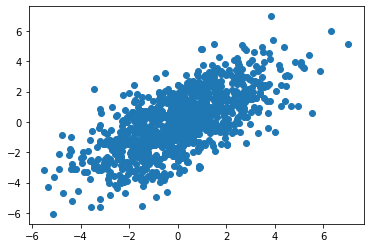

In [114]:
plt.scatter(y.T[:,0], y.T[:,1])

In [480]:
bias = stats.norm(0,3).rvs(500)

In [481]:
x = stats.norm(5,5).rvs([1000,500])

In [487]:
y = np.dot(x, bias) + stats.norm(0,1).rvs(1000)

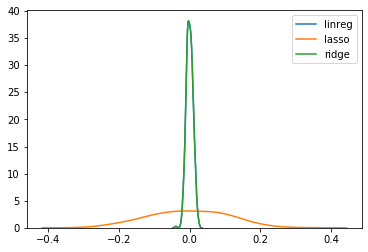

In [498]:
bias = stats.norm(0,3).rvs(500)
x = stats.norm(5,5).rvs([1000,500])
y = np.dot(x, bias) + stats.norm(0,1).rvs(1000)

clf = LinearRegression()
clf.fit(x, y)
kdeplot(clf.coef_-bias, label='linreg')

clf = Lasso()
clf.fit(x, y)
kdeplot(clf.coef_-bias, label='lasso')
plt.legend()

clf = Ridge()
clf.fit(x, y)
kdeplot(clf.coef_-bias, label='ridge')
plt.legend()

In [519]:
np.triu(r, 1) + np.triu(r, 1).T + np.eye(500)*stats.norm().rvs(500)

array([[0.63564062, 0.88960117, 0.26652704, ..., 0.2853946 , 0.87676084,
        0.33050589],
       [0.88960117, 0.36031991, 0.95941864, ..., 0.35919283, 0.23707707,
        0.16459285],
       [0.26652704, 0.95941864, 0.32382917, ..., 0.28324975, 0.93532349,
        0.69952134],
       ...,
       [0.2853946 , 0.35919283, 0.28324975, ..., 1.0962113 , 0.84823806,
        0.62217522],
       [0.87676084, 0.23707707, 0.93532349, ..., 0.84823806, 1.39680608,
        0.42522541],
       [0.33050589, 0.16459285, 0.69952134, ..., 0.62217522, 0.42522541,
        1.84614511]])

In [522]:
r

array([[1.        , 0.15776212, 0.76425737, ..., 0.53149126, 0.241272  ,
        0.8415247 ],
       [0.15776212, 1.        , 0.80007898, ..., 0.75523908, 0.99393594,
        0.27304112],
       [0.76425737, 0.80007898, 1.        , ..., 0.30295297, 0.10343994,
        0.75101666],
       ...,
       [0.53149126, 0.75523908, 0.30295297, ..., 1.        , 0.43356457,
        0.71756282],
       [0.241272  , 0.99393594, 0.10343994, ..., 0.43356457, 1.        ,
        0.95978439],
       [0.8415247 , 0.27304112, 0.75101666, ..., 0.71756282, 0.95978439,
        1.        ]])

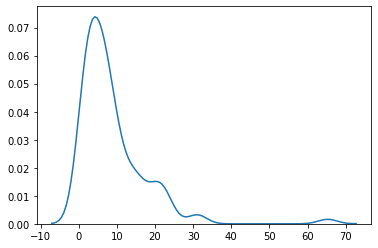

In [571]:
kdeplot(stats.expon(0,10).rvs(100))

In [574]:
x

array([[-1.29521564,  7.07866485,  1.46773918, ...,  4.95275106,
         3.6957109 ,  5.12754561],
       [ 2.64976129, 14.82936622,  2.79377972, ...,  5.16883816,
         6.56730431,  9.27761917],
       [ 5.89039145, 14.86741379,  5.08508878, ..., 12.4188126 ,
        19.76785716,  7.28113133],
       ...,
       [ 4.76760741,  3.60021414,  3.0719113 , ..., 12.64885941,
         1.42742192,  2.03709864],
       [ 7.17502064,  4.40797031, 10.58602295, ..., 10.98571005,
        -3.53030587,  0.70808536],
       [ 5.61948318, 10.51431571, -3.2052985 , ..., -3.63640916,
         7.18759835,  9.06731612]])

/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11896.08666325084, tolerance: 5790.759824060832
  positive)


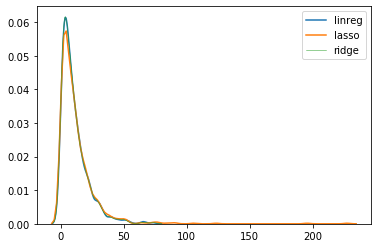

In [577]:
import copy
bias = stats.norm(0,3).rvs(1000)
bias = stats.expon(0,10).rvs(1000)
x = stats.norm(5,5).rvs([10,1000])

#r = stats.beta(1,1).rvs([1000,1000])*3
#r = np.triu(r, 1) + np.triu(r, 1).T + (np.eye(1000)*stats.norm().rvs(1000)+(np.eye(1000)*10))
#c = cholesky(r, lower=True)
#x_corr = np.dot(c, x.T).T
x_corr = copy.copy(x)

y = np.dot(x_corr, bias) + stats.norm(0,1).rvs(10)

clf = LinearRegression()
clf.fit(x_corr, y)
kdeplot(np.abs(clf.coef_-bias), label='linreg')

clf = Lasso()
clf.fit(x_corr, y)
kdeplot(np.abs(clf.coef_-bias), label='lasso')
plt.legend()

clf = Ridge()
clf.fit(x_corr, y)
kdeplot(np.abs(clf.coef_-bias), label='ridge', linewidth=0.5)
plt.legend()

In [583]:
x = stats.norm(0,1).rvs(20)
x2 = stats.norm(0,1).rvs() + 0.2*x

In [586]:
np.vstack([x,x2]).T

array([[ 1.13640815,  0.35113289],
       [-0.08874153,  0.10610296],
       [ 0.76413984,  0.27667923],
       [ 2.70581222,  0.66501371],
       [ 1.3627596 ,  0.39640318],
       [-0.09533833,  0.1047836 ],
       [-0.49518887,  0.02481349],
       [ 1.21212216,  0.3662757 ],
       [ 0.16823242,  0.15749775],
       [ 1.24857598,  0.37356646],
       [-0.12685024,  0.09848122],
       [-0.10991461,  0.10186834],
       [-0.12547998,  0.09875527],
       [-1.74823113, -0.22579496],
       [ 1.4955619 ,  0.42296365],
       [ 0.61936535,  0.24772434],
       [ 0.47336173,  0.21852361],
       [ 0.3813977 ,  0.2001308 ],
       [-0.86024077, -0.04819689],
       [ 0.71437666,  0.2667266 ]])

In [651]:
import copy
from sklearn.linear_model import ElasticNet

lin=list()
#las=list()
rid=list()

for _ in range(1000):
    x = stats.norm(0,1).rvs(20)
    x2 = stats.norm(0,1).rvs(20) + 3*x
    eps = stats.norm(0,2).rvs(20)

    x_corr = np.vstack([x,x2]).T

    y = 2+2*x+2*x2+eps

    clf = LinearRegression()
    clf.fit(x_corr, y)
    lin.append(clf.coef_)
    #

    #clf = ElasticNet()
    #clf.fit(x_corr, y)
    #las.append(clf.coef_)
               
    clf = Ridge()
    clf.fit(x_corr, y)
    rid.append(clf.coef_)
    
    
lin=np.array(lin)
#las=np.array(las)
rid=np.array(rid)

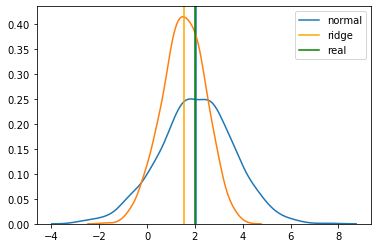

In [652]:
kdeplot(lin[:,0])
plt.axvline(np.mean(lin[:,0]), label='normal')



kdeplot(rid[:,0])
plt.axvline(np.mean(rid[:,0]), label='ridge', c='orange')

plt.axvline(2, label='real', c='green')
plt.legend()

In [132]:
noise = stats.norm(0, 3).rvs(10)

In [136]:
y = x_range * 1 + noise

In [248]:
x_one = np.linspace(-200,-100, 20)
x_two = np.linspace(-10,10, 20)
x = np.vstack([x_one, x_two]).T
x

array([[-200.        ,  -10.        ],
       [-194.73684211,   -8.94736842],
       [-189.47368421,   -7.89473684],
       [-184.21052632,   -6.84210526],
       [-178.94736842,   -5.78947368],
       [-173.68421053,   -4.73684211],
       [-168.42105263,   -3.68421053],
       [-163.15789474,   -2.63157895],
       [-157.89473684,   -1.57894737],
       [-152.63157895,   -0.52631579],
       [-147.36842105,    0.52631579],
       [-142.10526316,    1.57894737],
       [-136.84210526,    2.63157895],
       [-131.57894737,    3.68421053],
       [-126.31578947,    4.73684211],
       [-121.05263158,    5.78947368],
       [-115.78947368,    6.84210526],
       [-110.52631579,    7.89473684],
       [-105.26315789,    8.94736842],
       [-100.        ,   10.        ]])

In [431]:
beta_one = 0
beta_two = 5

x = stats.norm(0,1).rvs([100,2])
y = np.dot(x, np.array([beta_one, beta_two]).T) + stats.norm(0,1).rvs(100)

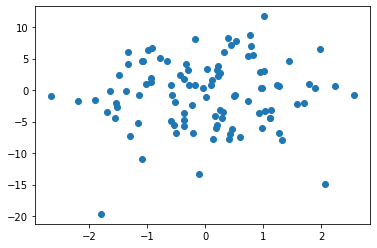

In [432]:
plt.scatter(x[:,0], y)

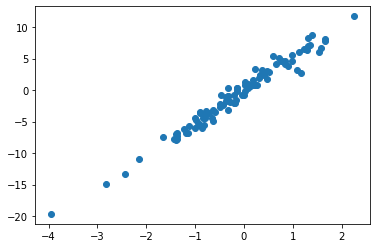

In [433]:
plt.scatter(x[:,1], y)

In [447]:
beta_one = 1
beta_two = 5

params_one = list()
params_two = list()
for _ in range(1000):
    x = stats.norm(0,1).rvs([100,2])
    y = np.dot(x, np.array([beta_one, beta_two]).T) + stats.norm(0,1).rvs(100)

    clf = LinearRegression()
    clf.fit(x, y)
    params_one.append(clf.coef_)
    
    clf = Lasso()
    clf.fit(x, y)
    params_two.append(clf.coef_)
    
params_one = np.array(params_one)
params_two = np.array(params_two)

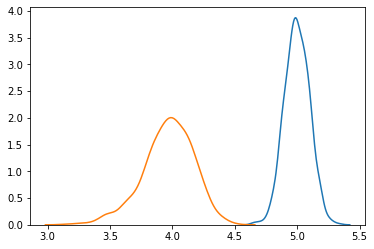

In [448]:
kdeplot(params_one[:,1])
kdeplot(params_two[:,1])

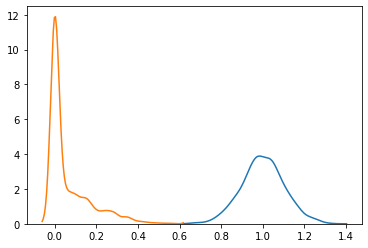

In [449]:
kdeplot(params_one[:,0])
kdeplot(params_two[:,0])

In [471]:
params_one = list()
params_two = list()

# The desired covariance matrix.
r = np.array([
        [  1, 0.95],
        [ 0.1,  1]
    ])
c = cholesky(r, lower=True)

for _ in range(1000):
    x = stats.norm(0,1).rvs([100,2])
    x_corr = np.dot(c, x.T)
    
    y = np.dot(x_corr.T, np.array([beta_one, beta_two]).T) + stats.norm(0,1).rvs(100)

    clf = LinearRegression()
    clf.fit(x, y)
    params_one.append(clf.coef_)
    
    clf = Lasso()
    clf.fit(x, y)
    params_two.append(clf.coef_)
    
params_one = np.array(params_one)
params_two = np.array(params_two)

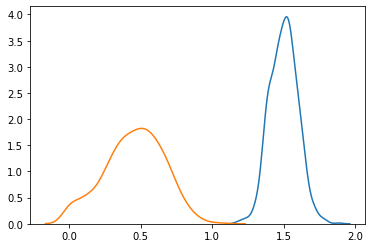

In [472]:
kdeplot(params_one[:,0])
kdeplot(params_two[:,0])

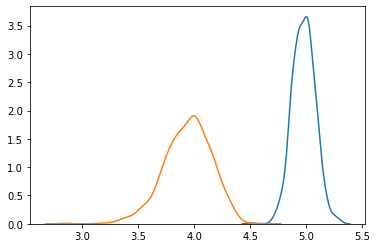

In [473]:


kdeplot(params_one[:,1])
kdeplot(params_two[:,1])

In [406]:
beta_one = 0
beta_two = 5
s_one = 3
s_two=5

points_one = stats.norm(beta_one, s_one).rvs(100)
points_two = stats.norm(beta_two, s_two).rvs(100)

x = np.vstack([points_one, points_two]).T

y = np.dot(x, np.array([beta_one, beta_two]))

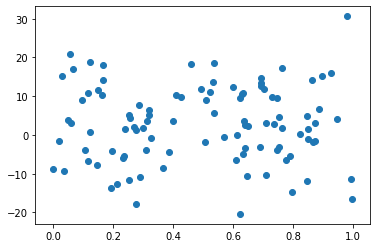

In [380]:
plt.scatter(x[:,0], y)

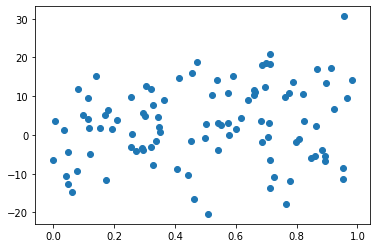

In [381]:
plt.scatter(x[:,1], y)

In [317]:
#X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(x, np.array([10, 0])) + stats.norm(0,100).rvs(20)


In [318]:
clf = LinearRegression().fit(x, y)
print(clf.coef_)

[9.96788682 1.99357736]


In [319]:
clf = Lasso().fit(x, y)
print(clf.coef_)

[10.36551658  0.        ]


In [320]:
params_one = list()
params_two = list()
for _ in range(100):
    noise = stats.norm(0,3).rvs(20)
    y = np.dot(x, np.array([10, 0])) + stats.norm(0,100).rvs(20)

    
    clf = LinearRegression().fit(x, y)
    params_one.append(clf.coef_)

    
    clf = Lasso().fit(x, y)
    params_two.append(clf.coef_)

params_one = np.array(params_one)
params_two = np.array(params_two)

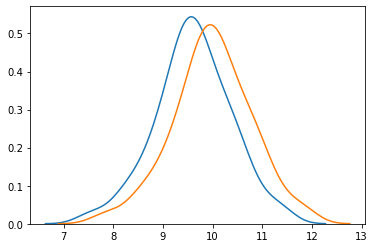

In [328]:
kdeplot(params_one[:,0])
kdeplot(params_two[:,0])

In [329]:
params_one = list()
params_two = list()
for _ in range(100):
    y = np.dot(x, np.array([10, 8])) + stats.norm(0,100).rvs(20)

    
    clf = LinearRegression().fit(x, y)
    params_one.append(clf.coef_)

    
    clf = Ridg().fit(x, y)
    params_two.append(clf.coef_)

params_one = np.array(params_one)
params_two = np.array(params_two)

/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


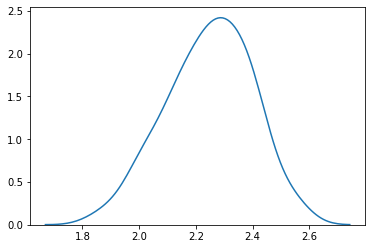

In [331]:
kdeplot(params_one[:,1])
kdeplot(params_two[:,1])

In [305]:
params_one = list()
params_two = list()
for _ in range(100):
    noise = stats.norm(0,3).rvs(20)
    y = x_one*betas[0] + x_two*betas[1] + noise

    
    clf = LinearRegression().fit(x, y.reshape(-1,1))
    params_one.append(clf.coef_)

    
    clf = Lasso().fit(x, y.reshape(-1,1))
    params_two.append(clf.coef_)

params_one = np.array(params_one)
params_two = np.array(params_two)

/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


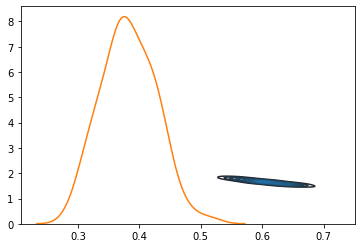

In [199]:
kdeplot(np.exp(params_one[:,0]))
kdeplot(np.exp(params_two[:,0]))

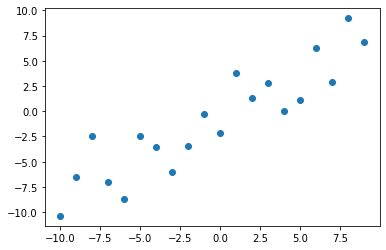

In [163]:
plt.scatter(np.arange(-10,10),y)

In [156]:
betas[:,np.newaxis]

array([[0],
       [1]])

In [142]:
for point in y.T:
for _ in range(1000):
    points = stats.norm(x_range, 3).rvs()
    clf = LinearRegression().fit(x_range.reshape(-1,1), points.reshape(-1,1))
    params_one.append(clf.coef_.flatten()[0])
    
    clf = Lasso().fit(x_range.reshape(-1,1), points.reshape(-1,1))
    params_two.append(clf.coef_.flatten()[0])

IndentationError: expected an indented block (<ipython-input-142-b9c38b20d291>, line 2)